### Mortality and Readmission Outcomes of a Heart Failure Cohort

#### Part 3 : Multivariate Analyses

#### Data Source: Physionet: Hospitalized Patients with Heart Failure (Zhang et al., 2020)

### Outline

I.  Data Loading 

II.  Bivariate Analyses 

    A.  Custom Codes
    B.  Analyses
        1.  Based on Correlation with 28-day Mortality
        2.  Based on Published Risk Score
        3.  Based on Clinical Practice
    
    
III.  Multivariate Analyses

    A.  Custom Codes
    B.  Select analyses

IV.  Summary of Findings

#### I. Data Loading

In [139]:
# HF EHR and outcome
import pandas as pd
pd.options.display.max_columns = 170
pd.options.display.max_colwidth = 100
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [141]:
# loading de-identified data, prepared in Parts 1 and 2
hf3 = pd.read_csv('hf2.csv', header =0, usecols = ['age','gender','visit.times',
 'admission.way', 'HR', 'HR_group','RR', 'RR_group','SBP', 'SBP_group',
 'DBP', 'DBP_group','MAP', 'MAP_group', 'temp', 'temp_group', 'Wt', 'Wt_group',
 'BMI','BMI_group','GCS', 'CHF', 'HF.type', 'NYHA','MI','Killip','DM','PVD',
 'CVD','CKD', 'ARF', 'COPD', 'RespFailureII', 'resp.support', 'O2', 'FiO2',
 'FiO2_group','CTD','PUD', 'liver.disease', 'dementia', 'hemiplegia','lymphoma', 'solid.tumor',
 'AIDS', 'CCI.score', 'LVEDD', 'LVEDD_group', 'WBC', 'WBC_group','mono.ct',
 'mono.ratio','neut.ct','neut.ratio', 'lymph.ct', 'baso.ct','baso.ratio',
 'eo.ct','eo.ratio','RBC', 'Hb', 'Hb_group', 'Hct', 'CV.RBC.DW', 'SD.RBC.DW',
 'MCV', 'MHV', 'MHC', 'Plt', 'Plt_group', 'MPV', 'P.DW', 'Plt.hct','INR',
 'APTT', 'TT', 'PT.act', 'PT.ratio', 'Ddimer', 'Ddimer_group', 'fibrinogen',
 'CK', 'CK_group', 'CK.enz', 'CK.enz.CK', 'GFR', 'GFR_group', 'crea', 'crea_group',
 'urea', 'urea_group', 'uric.acid', 'cystatin', 'CO2.BC', 'Na', 'Na_group',
 'K', 'Cl', 'Ca', 'HBD.LDH', 'HBD', 'AST', 'LDH', 'LDH_group', 'BNP', 'BNP_group',
 'nucleotidase', 'fucosidase', 'albumin', 'globulin', 'w.glob.ratio', 'GTP',
 'ALT', 'DB', 'IB', 'TB', 'AP', 'bile', 'TP', 'cholesterol', 'LDL', 'HDL',
 'triglyceride', 'hosp.outcome', 'LOS', 'LOS_group', 'destination', 'mort.28d',
 'mort.3mo', 'mort.6mo', 'mort.time.fr.adm', 'mort.time_group', 'read.28d',
 'read.3mo', 'read.6mo', 'read.time.fr.adm', 'read.time_group', 'ED.6mo'])
hf3.head()

,age,gender,visit.times,admission.way,HR,HR_group,RR,RR_group,SBP,SBP_group,DBP,DBP_group,MAP,MAP_group,temp,temp_group,Wt,Wt_group,BMI,BMI_group,GCS,CHF,HF.type,NYHA,MI,Killip,DM,PVD,CVD,CKD,ARF,COPD,RespFailureII,resp.support,O2,FiO2,FiO2_group,CTD,PUD,liver.disease,dementia,hemiplegia,lymphoma,solid.tumor,AIDS,CCI.score,LVEDD,LVEDD_group,WBC,WBC_group,mono.ct,mono.ratio,neut.ct,neut.ratio,lymph.ct,baso.ct,baso.ratio,eo.ct,eo.ratio,RBC,Hb,Hb_group,Hct,CV.RBC.DW,SD.RBC.DW,MCV,MHV,MHC,Plt,Plt_group,MPV,P.DW,Plt.hct,INR,APTT,TT,PT.act,PT.ratio,Ddimer,Ddimer_group,fibrinogen,CK,CK_group,CK.enz,CK.enz.CK,GFR,GFR_group,crea,crea_group,urea,urea_group,uric.acid,cystatin,CO2.BC,Na,Na_group,K,Cl,Ca,HBD.LDH,HBD,AST,LDH,LDH_group,BNP,BNP_group,nucleotidase,fucosidase,albumin,globulin,w.glob.ratio,GTP,ALT,DB,IB,TB,AP,bile,TP,cholesterol,LDL,HDL,triglyceride,hosp.outcome,LOS,LOS_group,destination,mort.28d,mort.3mo,mort.6mo,mort.time.fr.adm,mort.time_group,read.28d,read.3mo,read.6mo,read.time.fr.adm,read.time_group,ED.6mo
0,"(69,79]",Male,1,NonEmergency,87,76-100,19,16-20,102,91 - 110,64,51-70,76.666667,71-90,36.7,36.1 - 37.0,50,<=50,18,17.1 - 19,15,0,Both,3,0,3,1,0,0,0,0,1,NonTypeII,NoSupport,OxygenTherapy,33,21-40,0,0,0,0,0,0,0,0,2,52.0,51-60,9.43,6-10,0.80,0.085,7.05,0.746,1.51,0.05,0.006,0.02,0.002,4.09,131,111-140,0.387,15.0,50.3,94,32.0,338,102,101-150,14.0,16.6,0.142,1.39,33,17.0,60,1.37,1.19,0.056 - 5,3.84,43,<=50,9.6,0.22,58,51-75,108,101-150,12.55,11 - 15,685,1.32,21.6,134,131-135,5.59,101,2.28,0.630000,185,65,294,201-300,1500,1001-2000,3.5,20.5,38,23.8,1.6,83,81.0,6.9,11.4,18.3,61,4.9,61,3.46,1.90,0.84,2.69,Alive,11,8- 14,Home,0,0,0,NaN,NaN,0,0,0,NaN,NaN,0
1,"(69,79]",Female,1,NonEmergency,95,76-100,18,16-20,150,131 - 150,70,51-70,96.666667,91-110,36.8,36.1 - 37.0,51,51-60,19,17.1 - 19,15,0,Both,3,0,1,0,0,0,0,0,0,NonTypeII,NoSupport,OxygenTherapy,33,21-40,0,0,0,0,0,0,0,0,0,40.0,31-40,5.32,<=5,0.35,0.066,3.73,0.702,1.18,0.01,0.002,0.05,0.009,3.93,114,111-140,0.349,13.0,40.7,88,28.9,326,123,101-150,11.3,16.1,0.139,1.16,35,18.4,65,1.18,1.06,0.056 - 5,2.62,107,101-150,17.2,0.16,85,76-100,62,51-100,4.29,<= 5,170,1.25,26.5,144,141-145,3.62,105,2.28,0.840000,170,19,203,201-300,361,101-500,2.2,21.9,40,25.4,1.6,17,21.0,5.2,13.1,18.3,69,2.4,66,3.15,1.26,1.30,0.84,Alive,8,8- 14,Home,0,0,0,NaN,NaN,0,0,0,NaN,NaN,0
2,"(59,69]",Male,2,NonEmergency,98,76-100,18,16-20,102,91 - 110,67,51-70,78.666667,71-90,36.5,36.1 - 37.0,70,61-70,24,23.1 - 25,15,0,Both,2,0,2,0,0,0,0,0,0,NonTypeII,NoSupport,OxygenTherapy,33,21-40,0,0,0,0,0,0,0,0,0,46.0,41-50,13.01,11-15,0.67,0.051,11.54,0.887,0.75,0.03,0.002,0.02,0.002,4.43,144,141-170,0.427,12.9,44.5,96,32.6,339,169,151-200,12.0,16.5,0.203,1.10,36,14.9,85,1.09,0.83,0.056 - 5,5.74,38,<=50,14.6,0.38,31,26-50,185,151-200,15.99,11 - 15,567,2.43,21.6,142,141-145,4.15,107,2.56,0.770000,105,10,137,101-200,293,101-500,2.3,12.3,33,27.7,1.2,27,9.0,4.4,7.5,11.9,76,2.4,60,3.79,2.13,0.94,1.53,Alive,5,<= 7,Home,0,0,0,NaN,NaN,0,0,0,NaN,NaN,0
3,"(69,79]",Male,1,Emergency,73,50-75,19,16-20,110,91 - 110,74,71-90,86.000000,71-90,36.0,35.0 - 36.0,65,61-70,22,21.1 - 23,15,0,Both,3,0,2,0,0,0,1,0,1,NonTypeII,NoSupport,OxygenTherapy,33,21-40,0,0,0,0,0,0,0,0,2,52.0,51-60,2.18,<=5,0.19,0.087,1.22,0.559,0.71,0.00,0.000,0.06,0.028,2.71,94,81-110,0.277,18.8,69.0,102,34.7,339,35,<50,12.4,19.4,0.032,1.37,38,18.3,60,1.36,1.39,0.056 - 5,2.63,89,51-100,15.8,0.17,58,51-75,104,101-150,8.16,5.1 -10,635,2.32,21.1,136,136-140,3.76,101,2.35,0.817057,183,9,225,201-300,1071,1001-2000,11.2,19.4,40,27.0,1.5,134,25.0,25.4,26.2,51.6,191,9.4,67,2.92,1.31,0.98,0.92,Alive,11,8- 14,Home,0,0,0,NaN,NaN,1,1,1,19.0,3rd week,1
4,"(69,79]",Female,1,NonEmergency,88,76-100,19,16-20,134,131 - 150,62,51-70,86.000000,71-90,35.0,35.0 - 36.0,76,71-80,31,>27,15,0,Both,3,0,2,0,0,0,0,0,0,NonTypeII,NoSupport,OxygenTherapy,33,21-40,0,0,0,0,0,0,0,0,0,64.0,61-70,6.14,6-10,0.53,0.086,4.28,0.697,1.27,0.01,0.002,0.05,0.008,4.20,120,111-140,0.378,14.7,47.7,90,28.6,317,104,101-150,12

In [142]:
# trimming out the bin groups
# placed target outcome mort.28d as index 1 for easier reference
hf4 = hf3[ ['mort.28d','age','gender','visit.times',
 'admission.way', 'HR', 'RR', 'SBP', 
 'DBP', 'MAP',  'temp',  'Wt', 
 'BMI','GCS', 'CHF', 'HF.type', 'NYHA','Killip','PVD',
 'CVD','CKD', 'ARF', 'RespFailureII', 'resp.support', 'O2', 'FiO2',
 'CTD', 'liver.disease', 'dementia', 'hemiplegia','lymphoma', 'solid.tumor',
 'AIDS', 'CCI.score', 'LVEDD',  'WBC', 'mono.ct',
 'mono.ratio','neut.ct','neut.ratio', 'lymph.ct', 'baso.ct','baso.ratio',
 'eo.ct','eo.ratio','RBC', 'Hb',  'Hct', 'CV.RBC.DW', 'SD.RBC.DW',
 'MCV', 'MHV', 'MHC', 'Plt',  'MPV', 'P.DW', 'Plt.hct','INR',
 'APTT', 'TT', 'PT.act', 'PT.ratio', 'Ddimer',  'fibrinogen',
 'CK',  'CK.enz', 'CK.enz.CK', 'GFR',  'crea', 
 'urea',  'uric.acid', 'cystatin', 'CO2.BC', 'Na', 
 'K', 'Cl', 'Ca', 'HBD.LDH', 'HBD', 'AST', 'LDH',  'BNP', 
 'nucleotidase', 'fucosidase', 'albumin', 'globulin', 'w.glob.ratio', 'GTP',
 'ALT', 'DB', 'IB', 'TB', 'AP', 'bile', 'TP', 'cholesterol', 'LDL', 'HDL',
 'triglyceride', 'hosp.outcome','LOS', 'read.28d']]

In [143]:
hf4.to_csv('~/Desktop/hf4.csv')

In [144]:
# chosen outcome measure:
# previous univariate exploration showed that the mort.28d showed the most
# availability of data on death

In [145]:
mort28= hf3[ hf3['mort.28d']==1 ]
mort28.head()

,age,gender,visit.times,admission.way,HR,HR_group,RR,RR_group,SBP,SBP_group,DBP,DBP_group,MAP,MAP_group,temp,temp_group,Wt,Wt_group,BMI,BMI_group,GCS,CHF,HF.type,NYHA,MI,Killip,DM,PVD,CVD,CKD,ARF,COPD,RespFailureII,resp.support,O2,FiO2,FiO2_group,CTD,PUD,liver.disease,dementia,hemiplegia,lymphoma,solid.tumor,AIDS,CCI.score,LVEDD,LVEDD_group,WBC,WBC_group,mono.ct,mono.ratio,neut.ct,neut.ratio,lymph.ct,baso.ct,baso.ratio,eo.ct,eo.ratio,RBC,Hb,Hb_group,Hct,CV.RBC.DW,SD.RBC.DW,MCV,MHV,MHC,Plt,Plt_group,MPV,P.DW,Plt.hct,INR,APTT,TT,PT.act,PT.ratio,Ddimer,Ddimer_group,fibrinogen,CK,CK_group,CK.enz,CK.enz.CK,GFR,GFR_group,crea,crea_group,urea,urea_group,uric.acid,cystatin,CO2.BC,Na,Na_group,K,Cl,Ca,HBD.LDH,HBD,AST,LDH,LDH_group,BNP,BNP_group,nucleotidase,fucosidase,albumin,globulin,w.glob.ratio,GTP,ALT,DB,IB,TB,AP,bile,TP,cholesterol,LDL,HDL,triglyceride,hosp.outcome,LOS,LOS_group,destination,mort.28d,mort.3mo,mort.6mo,mort.time.fr.adm,mort.time_group,read.28d,read.3mo,read.6mo,read.time.fr.adm,read.time_group,ED.6mo
43,"(69,79]",Male,1,NonEmergency,55,50-75,20,16-20,90,71 - 90,62,51-70,71.333333,71-90,36.0,35.0 - 36.0,65,61-70,23,21.1 - 23,15,0,Both,3,0,3,1,0,0,1,0,0,NonTypeII,NoSupport,OxygenTherapy,33,21-40,0,0,1,0,0,0,0,0,3,53.0,51-60,15.64,11-15,0.89,0.057,11.56,0.739,3.14,0.05,0.003,0.00,0.000,3.14,104,81-110,0.338,16.9,65.5,107,33.1,308,43,<50,12.4,16.4,0.039,2.07,38,17.2,33,2.10,11.25,11 - 15,2.43,155,151-200,83.1,0.54,17,<25,285,251-300,15.52,11 - 15,771,1.75,18.3,135,131-135,5.34,92,2.09,0.44,1147,2096,2616,> 500,832,501-1000,7.0,26.700000,28,43.3,0.7,68,4262.0,27.9,23.6,51.5,119,25.8,71,2.17,1.18,0.53,0.76,Alive,4,<= 7,Unknown,1,1,1,11.0,2nd week,0,0,0,NaN,NaN,0
74,"(69,79]",Female,1,Emergency,96,76-100,21,21-25,160,151 - 170,94,91-110,116.000000,111-130,36.1,36.1 - 37.0,43,<=50,18,17.1 - 19,15,0,Both,2,0,3,0,0,0,0,0,0,NonTypeII,NoSupport,OxygenTherapy,33,21-40,0,0,0,0,0,0,0,0,0,60.0,51-60,8.37,6-10,0.36,0.042,6.66,0.796,1.34,0.01,0.002,0.00,0.000,3.90,111,111-140,0.359,13.8,44.8,92,28.6,310,165,151-200,14.3,16.2,0.236,1.36,42,16.7,46,1.39,3.34,0.056 - 5,5.33,86,51-100,17.2,0.20,65,51-75,76,51-100,7.36,5.1 -10,367,1.14,10.2,126,126-130,4.47,90,2.18,0.86,206,955,240,201-300,3526,3001-4000,4.3,18.700000,36,29.7,1.2,74,113.0,12.9,12.6,25.5,111,25.3,66,4.88,1.86,1.94,0.63,Alive,5,<= 7,Unknown,1,1,1,15.0,3rd week,0,0,0,NaN,NaN,0
89,"(79,89]",Male,1,NonEmergency,88,76-100,18,16-20,120,111 - 130,70,51-70,86.666667,71-90,36.3,36.1 - 37.0,60,51-60,19,17.1 - 19,15,0,Both,3,0,2,0,0,0,0,0,0,TypeII,NoSupport,OxygenTherapy,33,21-40,0,0,0,0,0,0,0,0,0,73.0,>70,10.41,6-10,0.79,0.076,7.74,0.743,0.79,0.03,0.003,1.06,0.102,2.83,91,81-110,0.276,13.2,46.8,97,32.2,330,188,151-200,12.5,15.5,0.240,1.58,35,15.9,38,1.61,3.55,0.056 - 5,3.66,104,101-150,24.0,0.23,20,<25,235,201-250,25.96,21 - 25,980,4.90,25.1,136,136-140,3.84,95,2.27,0.56,307,198,551,> 500,3999,3001-4000,13.0,10.300000,34,28.3,1.2,226,218.0,5.0,10.3,15.3,203,5.8,63,2.83,1.63,0.78,1.06,Dead,26,22- 28,Died,1,1,1,26.0,4th week,0,0,0,NaN,NaN,0
94,"(79,89]",Male,1,Emergency,155,>150,22,21-25,166,151 - 170,80,71-90,108.666667,91-110,36.0,35.0 - 36.0,55,51-60,19,17.1 - 19,15,0,Both,2,0,3,0,0,0,0,1,0,TypeII,NoSupport,OxygenTherapy,33,21-40,0,0,0,0,0,0,0,0,0,51.0,51-60,11.11,11-15,0.11,0.010,9.27,0.834,1.65,0.03,0.003,0.05,0.005,2.33,66,51-80,0.227,16.7,58.8,97,28.3,290,336,301-350,11.9,16.4,0.401,2.00,51,20.6,36,1.97,26.11,>20,3.63,271,251-300,66.7,0.25,16,<25,294,251-300,16.56,16 - 20,715,5.23,2.1,133,131-135,6.97,103,2.43,0.62,319,59,517,> 500,4731,4001-5000,2.9,19.149807,32,50.3,0.6,76,143.0,11.6,13.5,25.1,347,4.6,82,3.11,1.68,0.78,1.20,Alive,2,<= 7,Unknown,1,1,1,25.0,4th week,0,0,0,NaN,NaN,0
140,"(69,79]",Female,1,Emergency,121,101-125,23,21-25,168,151 - 170,101,91-110,123.333333,111-130,38.1,38.1 - 39.0,50,<=50,23,21.1 - 23,15,1,Both,3,0,2,0,0,0,0,0,0,NonTypeII,NoSupport,OxygenTherapy,33,21-40,0,0,0,0,0,0,0,0,1,52.0,51-60,11.39,11-15,0.40,0.035,9.56,0.840,1.21,0.05,0.004,0.17,0.015,4.45,

In [146]:
mort28.shape

(37, 138)

#### II. A.  Bivariate Analysis Custom Codes

In [147]:
def bivariate_table_pieplots(var, title):
    print('28-Day Mortality Among', title, 'Groups')
    val = hf3.groupby('mort.28d')[var].value_counts().sort_index()
    ct = hf3.groupby('mort.28d') [var].count()
    perc = (val / ct * 100).round(2)
    overall = ((val/ 2008) * 100).round(2)
    table = pd.concat( [val, perc, overall], axis = 1, keys = ['Frequency', '% per group', '% overall'])
    display(table)
    val.unstack().plot.pie(subplots = True, figsize = (20,10), 
                           fontsize = 14, 
                           shadow=True, layout=(5,2),
                           legend = False, labels = None, 
                           autopct = '%.1f', pctdistance =0.3,
                           textprops = {'color':"w"}, 
                           explode = (0.15,0), startangle=90)
    plt.subplots_adjust(wspace=-0.75, hspace= 0,bottom =0)
    plt.legend(labels = ('Survival','Mortality'), bbox_to_anchor = (1,1))

In [148]:
def bivariate_table_pieplots1(var, title):
    print('28-Day Mortality Among', title, 'Groups')
    val = hf3.groupby('mort.28d')[var].value_counts().sort_index()
    ct = hf3.groupby('mort.28d') [var].count()
    perc = (val / ct * 100).round(2)
    overall = ((val/ 2008) * 100).round(2)
    table = pd.concat( [val, perc, overall], axis = 1, keys = ['Frequency', '% per group', '% overall'])
    display(table)
    val.unstack().plot.pie(subplots = True, figsize = (10,8), 
                           fontsize = 14, cmap= 'terrain', 
                           shadow=True, layout=(4,2),
                           legend = False, labels = None, 
                           autopct = '%.1f', pctdistance =0.3,
                           textprops = {'color':"w"}, 
                           explode = (0.15,0), startangle=90)
    plt.subplots_adjust(wspace=-0.4, hspace= 0,bottom =0)
    plt.legend(labels = ('Survival','Mortality'), bbox_to_anchor = (1,1))

In [149]:
def bivariate_table_pieplots2(var, title):
    print('28-Day Mortality Among', title, 'Groups')
    val = hf3.groupby('mort.28d')[var].value_counts().sort_index()
    ct = hf3.groupby('mort.28d') [var].count()
    perc = (val / ct * 100).round(2)
    overall = ((val/ 2008) * 100).round(2)
    table = pd.concat( [val, perc, overall], axis = 1, keys = ['Frequency', '% per group', '% overall'])
    display(table)
    val.unstack().plot.pie(subplots = True, figsize = (6,6), 
                           fontsize = 14, cmap = 'copper',
                           shadow=True, layout=(2,2),
                           legend = False, labels = None, 
                           autopct = '%.1f', pctdistance =0.3,
                           textprops = {'color':"w"}, 
                           explode = (0.15,0), startangle=90)
    plt.subplots_adjust(wspace=0.3, hspace= 0,bottom =0)
    plt.legend(labels = ('Survival','Mortality'), bbox_to_anchor = (1,1))

In [150]:
def bivariate_table_pieplots3(var, title):
    print('28-Day Mortality Among', title, 'Groups')
    val = hf3.groupby('mort.28d')[var].value_counts().sort_index()
    ct = hf3.groupby('mort.28d') [var].count()
    perc = (val / ct * 100).round(2)
    overall = ((val/ 2008) * 100).round(2)
    table = pd.concat( [val, perc, overall], axis = 1, keys = ['Frequency', '% per group', '% overall'])
    display(table)
    val.unstack().plot.pie(subplots = True, figsize = (10,10), 
                           fontsize = 14, cmap = 'copper',
                           shadow=True, layout=(1,5),
                           legend = False, labels = None, 
                           autopct = '%.1f', pctdistance =0.3,
                           textprops = {'color':"w"}, 
                           explode = (0.15,0), startangle=90)
    plt.legend(labels = ('Survival','Mortality'), bbox_to_anchor = (1,1))

In [151]:
def bivariate_table_pieplots4(var, title):
    print('28-Day Mortality Among', title, 'Groups')
    val = hf3.groupby('mort.28d')[var].value_counts().sort_index()
    ct = hf3.groupby('mort.28d') [var].count()
    perc = (val / ct * 100).round(2)
    overall = ((val/ 2008) * 100).round(2)
    table = pd.concat( [val, perc, overall], axis = 1, keys = ['Frequency', '% per group', '% overall'])
    display(table)
    val.unstack().plot.pie(subplots = True, figsize = (12,14), 
                           fontsize = 14, cmap = 'copper',
                           shadow=True, 
                           legend = False, labels = None, 
                           autopct = '%.1f', pctdistance =0.3,
                           textprops = {'color':"w"}, 
                           explode = (0.15,0), startangle=90)
    plt.legend(labels = ('Survival','Mortality'), bbox_to_anchor = (1,1))

In [152]:
def bivariate_table_pieplots5(var, title):
    print('28-Day Mortality Among', title, 'Groups')
    val = hf3.groupby('mort.28d')[var].value_counts().sort_index()
    ct = hf3.groupby('mort.28d') [var].count()
    perc = (val / ct * 100).round(2)
    overall = ((val/ 2008) * 100).round(2)
    table = pd.concat( [val, perc, overall], axis = 1, keys = ['Frequency', '% per group', '% overall'])
    display(table)
    val.unstack().plot.pie(subplots = True, figsize = (4,4), 
                           fontsize = 14, cmap = 'coolwarm',
                           shadow=True, 
                           legend = False, labels = None, 
                           autopct = '%.1f', pctdistance =0.3,
                           textprops = {'color':"w"}, 
                           explode = (0.2,0), startangle=90)
    plt.legend(labels = ('Survival','Mortality'), bbox_to_anchor = (1,1))

In [153]:
def bivariate_table_bar1(var1, title, labelx):
    print('Mortality Based on', title)
    val = hf3.groupby(var1)['mort.28d'].value_counts().sort_index()
    ct = hf3.groupby(var1) ['mort.28d'].count()
    perc = (val / ct * 100).round(2)
    overall = ((val/ 2008) * 100).round(2)
    table = pd.concat( [val, perc, overall], axis = 1, keys = ['Frequency', '% per group', '% overall'])
    display(table)
    val.unstack().plot.bar(figsize = (5,5), rot=0, stacked = True,
                           fontsize = 14, cmap= 'Paired',
                           legend = False)
    plt.legend(labels = ('Survival','Mortality'), bbox_to_anchor=(1,1))
    plt.ylabel('Frequency', fontsize =14)
    plt.xlabel(labelx, fontsize =14)

In [154]:
def bivariate_table_bar2(var1, title, labelx):
    print('Mortality Based on', title)
    val = hf3.groupby(var1)['mort.28d'].value_counts().sort_index()
    ct = hf3.groupby(var1) ['mort.28d'].count()
    perc = (val / ct * 100).round(2)
    overall = ((val/ 2008) * 100).round(2)
    table = pd.concat( [val, perc, overall], axis = 1, keys = ['Frequency', '% per group', '% overall'])
    display(table)
    val.unstack().plot.bar(figsize = (5,4), rot=45, stacked = True,
                           fontsize = 10, cmap= 'cividis',
                           legend = False)
    plt.legend(labels = ('Survival','Mortality'), bbox_to_anchor=(1,1))
    plt.ylabel('Frequency', fontsize =12)
    plt.xlabel(labelx, fontsize =12)
    plt.grid(color = 'black', alpha =0.2)

In [155]:
def bivariate_table_bar3(var1, title, labelx):
    print('Mortality Based on', title)
    val = hf3.groupby(var1)['mort.28d'].value_counts().sort_index()
    ct = hf3.groupby(var1) ['mort.28d'].count()
    perc = (val / ct * 100).round(2)
    overall = ((val/ 2008) * 100).round(2)
    table = pd.concat( [val, perc, overall], axis = 1, keys = ['Frequency', '% per group', '% overall'])
    display(table)
    val.unstack().plot.bar(figsize = (10,5), rot=45, stacked = True,
                           fontsize = 10, cmap= 'cividis',
                           legend = False)
    plt.legend(labels = ('Survival','Mortality'), bbox_to_anchor=(1,1))
    plt.ylabel('Frequency', fontsize =12)
    plt.xlabel(labelx, fontsize =12)
    plt.grid(color = 'black', alpha =0.2)

#### II. B. Bivariate Analyses:  
####          1.  Based on Correlation with 28-day Mortality Outcome

In [156]:
hf5 = hf4.corr()

In [157]:
hf5[ (hf5['mort.28d'] >= 0.2) | (hf5['mort.28d'] <= -0.2)]

,mort.28d,visit.times,HR,RR,SBP,DBP,MAP,temp,Wt,BMI,GCS,CHF,NYHA,Killip,PVD,CVD,CKD,ARF,FiO2,CTD,liver.disease,dementia,hemiplegia,lymphoma,solid.tumor,AIDS,CCI.score,LVEDD,WBC,mono.ct,mono.ratio,neut.ct,neut.ratio,lymph.ct,baso.ct,baso.ratio,eo.ct,eo.ratio,RBC,Hb,Hct,CV.RBC.DW,SD.RBC.DW,MCV,MHV,MHC,Plt,MPV,P.DW,Plt.hct,INR,APTT,TT,PT.act,PT.ratio,Ddimer,fibrinogen,CK,CK.enz,CK.enz.CK,GFR,crea,urea,uric.acid,cystatin,CO2.BC,Na,K,Cl,Ca,HBD.LDH,HBD,AST,LDH,BNP,nucleotidase,fucosidase,albumin,globulin,w.glob.ratio,GTP,ALT,DB,IB,TB,AP,bile,TP,cholesterol,LDL,HDL,triglyceride,LOS,read.28d
mort.28d,1.000000,-0.004325,0.031349,0.074249,-0.044627,-0.054609,-0.054799,-0.001769,0.001109,-0.011678,-0.397926,-0.022017,0.103966,0.210944,0.002354,0.031494,0.089519,0.117550,0.227516,-0.006121,0.082348,-0.017833,-0.010624,-0.003058,-0.019283,-0.006121,0.043143,0.028756,0.082950,0.050112,-0.022519,0.092599,0.092951,-0.027517,-0.038141,-0.075112,-0.028590,-0.045788,-0.048544,-0.043075,-0.035835,0.006843,0.023779,0.027365,0.003246,-0.051821,0.081774,-0.056629,-0.013850,0.061285,0.052397,0.053492,0.097138,-0.100725,0.056836,0.110643,0.049894,0.132451,0.202485,-0.031574,-0.099432,0.177429,0.195528,0.103947,0.145943,-0.129431,-0.064841,0.119281,-0.043848,-0.057923,-0.084015,0.190812,0.198913,0.242394,0.078970,-0.016062,-0.011349,-0.061846,0.056720,-0.074321,0.000051,0.281738,0.050905,0.002458,0.027348,0.051460,0.015624,0.005494,-0.020535,-0.004370,-0.033174,-0.001486,-0.070834,-0.037509
GCS,-0.397926,-0.035311,-0.027024,-0.110092,0.023696,0.051406,0.042332,0.044859,0.015769,0.019899,1.000000,-0.025136,-0.118576,-0.215929,-0.009560,-0.042839,-0.055654,0.008465,-0.455406,-0.107235,-0.001727,-0.022868,0.011098,0.003195,-0.016569,-0.003075,-0.045080,-0.029861,-0.118278,-0.027569,0.062191,-0.125043,-0.094354,-0.008935,0.011744,0.059524,0.028260,0.045370,0.015963,0.030738,0.021908,-0.027171,-0.008324,0.009856,0.027043,0.055273,-0.049904,0.059128,0.069657,-0.029595,-0.014978,0.004825,-0.012555,0.044487,-0.016779,-0.080482,-0.052558,-0.102406,-0.108592,0.018137,0.080566,-0.109921,-0.167907,-0.092495,-0.114514,0.112482,0.046908,-0.077573,0.030801,0.052423,0.050956,-0.043533,-0.076500,-0.048401,-0.032603,0.005196,-0.016952,0.037925,-0.014970,0.040512,-0.018873,-0.038865,-0.019765,0.022284,0.002196,-0.026139,0.009297,0.012641,-0.016148,-0.023103,0.004175,0.004633,-0.018950,0.015974
Killip,0.210944,0.006073,0.098101,0.101998,-0.065464,-0.087528,-0.084768,0.035725,-0.016189,-0.020485,-0.215929,0.007785,0.227699,1.000000,-0.039728,0.000300,0.034796,0.045070,0.226203,0.015142,-0.001220,0.024993,0.017773,0.000219,-0.022367,-0.014263,0.057228,0.051008,0.151448,0.047726,-0.076353,0.172338,0.174296,-0.051401,0.032006,-0.026871,-0.059702,-0.072440,-0.009542,-0.010176,-0.002649,0.055004,0.056613,0.010159,-0.000315,-0.027274,0.022992,-0.030952,0.017312,0.016808,0.008163,-0.006591,-0.002385,-0.032035,0.008128,0.123632,0.061509,0.065722,0.092813,-0.021250,-0.080425,0.050823,0.064778,0.041837,0.041081,-0.054855,-0.087388,0.025134,-0.079470,-0.051302,-0.110364,0.082509,0.095511,0.101952,0.114221,0.028854,0.014762,-0.085892,0.056885,-0.090557,0.039166,0.085205,0.036948,-0.012599,0.013469,0.022883,0.041581,-0.014706,-0.001374,0.009596,-0.006300,0.012815,-0.006099,0.038728
FiO2,0.227516,-0.006205,0.046526,0.151832,-0.004265,-0.020176,-0.014070,-0.009100,-0.022212,-0.014767,-0.455406,-0.024519,0.088982,0.226203,-0.027646,0.032442,0.018807,0.004100,1.000000,0.057114,0.030176,-0.014911,-0.032667,0.001547,-0.011490,0.003097,0.032149,0.030418,0.164617,0.052257,-0.092209,0.180250,0.156893,-0.022535,-0.001897,-0.066788,-0.049179,-0.074431,-0.023387,-0.028411,-0.025817,0.004700,-0.013184,-0.009662,-0.015504,-0.022976,0.062576,-0.058109,-0.059158,0.030254,0.009736,-0.012296,0.008135,-0.013997,0.009042,0.089130,0.073452,0.075639,0.090710,0.000516,-0.088294,0.077156,0.075748,0.070120,0.045877,-0.103355,-0.067065,0.039965,-0.039587,-0.044115,-0.057947,0.038651,0.129450,0.041898,0.065603,0

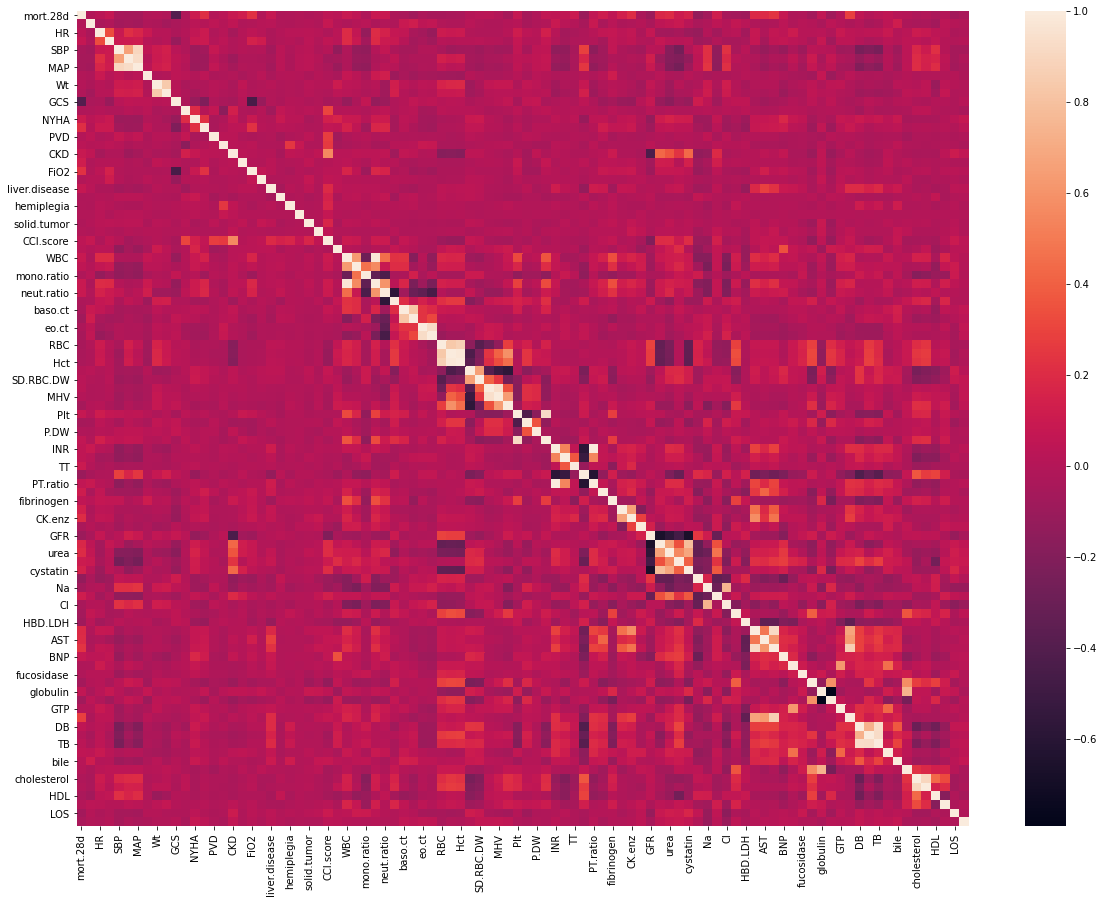

In [158]:
plt.subplots(figsize = (20,15))
sns.heatmap( (hf4.iloc[:,:].corr()));

Findings:
- There is no strong correlation of the variables with the outcome of 28-day mortality
- The highest correlation was that of GCS at -0.4, followed by ALT at +0.3

28-Day Mortality Among GCS Groups


Frequency  % per group  % overall
mort.28d GCS                                   
0        3            4         0.20       0.20
         6            1         0.05       0.05
         7            4         0.20       0.20
         10           7         0.36       0.35
         11          16         0.81       0.80
         12           3         0.15       0.15
         13           2         0.10       0.10
         14           5         0.25       0.25
         15        1929        97.87      96.07
1        3            9        24.32       0.45
         4            1         2.70       0.05
         11           3         8.11       0.15
         14           2         5.41       0.10
         15          22        59.46       1.10

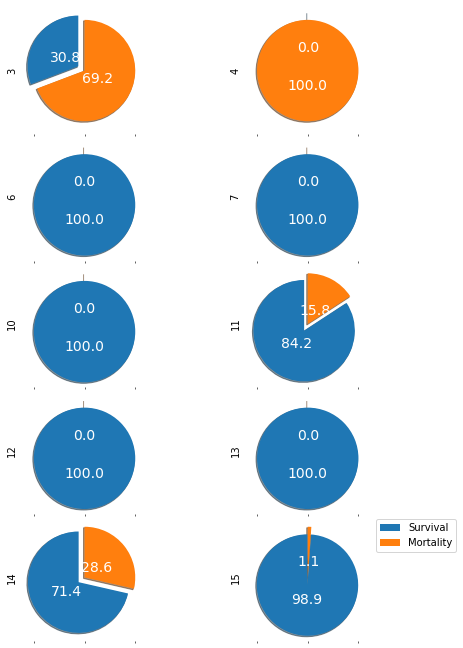

In [159]:
bivariate_table_pieplots('GCS','GCS')

Findings:
- There is a trend of higher mortality among patients who were admitted with low GCS scores of 3-4

Mortality Based on Killip score


Frequency  % per group  % overall
Killip mort.28d                                   
1      0               527       100.00      26.25
2      0              1021        99.22      50.85
       1                 8         0.78       0.40
3      0               377        96.17      18.77
       1                15         3.83       0.75
4      0                46        76.67       2.29
       1                14        23.33       0.70

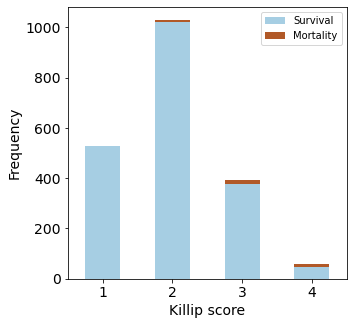

In [160]:
bivariate_table_bar1('Killip','Killip score', 'Killip score')

Findings:
- Mortality rates increase as the Killip score increases

28-Day Mortality Among FiO2 Groups


Frequency  % per group  % overall
mort.28d FiO2_group                                   
0        21-40            1938        98.33      96.51
         41-60              30         1.52       1.49
         61-80               1         0.05       0.05
         81-100              2         0.10       0.10
1        21-40              26        70.27       1.29
         41-60               8        21.62       0.40
         61-80               1         2.70       0.05
         81-100              2         5.41       0.10

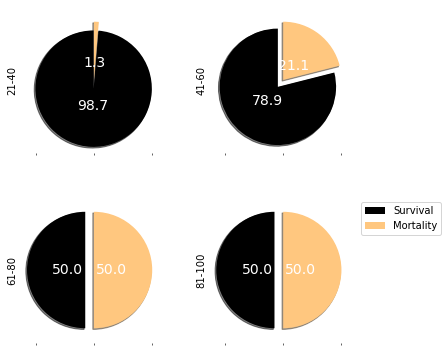

In [161]:
bivariate_table_pieplots2('FiO2_group','FiO2')

Findings:
- Mortality increases with increased O2-requirement
- (Put caution in interpreting as the quantity of outcomes are low)

In [162]:
hf3['CK.enz_group'] = pd.qcut(hf3['CK.enz'], q=4)

Mortality Based on CK enzyme group


Frequency  % per group  % overall
CK.enz_group  mort.28d                                   
(0.899, 12.5] 0               498        98.22      24.80
              1                 9         1.78       0.45
(12.5, 15.8]  0               506        99.41      25.20
              1                 3         0.59       0.15
(15.8, 20.7]  0               490        98.39      24.40
              1                 8         1.61       0.40
(20.7, 424.0] 0               477        96.56      23.75
              1                17         3.44       0.85

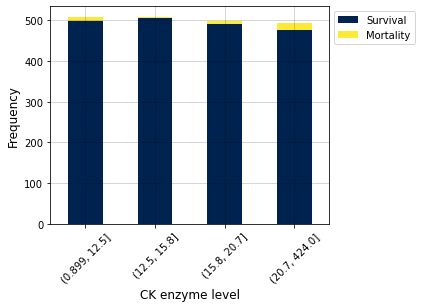

In [163]:
bivariate_table_bar2('CK.enz_group','CK enzyme group', 'CK enzyme level')

Findings:
- Increased CK enzyme levels seem to be associated with higher mortality

In [186]:
hf3['ALT_group'] = pd.qcut(hf3['ALT'], q=4)

Mortality Based on ALT group


Frequency  % per group  % overall
ALT_group      mort.28d                                   
(4.999, 21.0]  0               559        98.42      27.84
               1                 9         1.58       0.45
(21.0, 25.0]   0               438        99.55      21.81
               1                 2         0.45       0.10
(25.0, 36.0]   0               511        98.27      25.45
               1                 9         1.73       0.45
(36.0, 6640.0] 0               463        96.46      23.06
               1                17         3.54       0.85

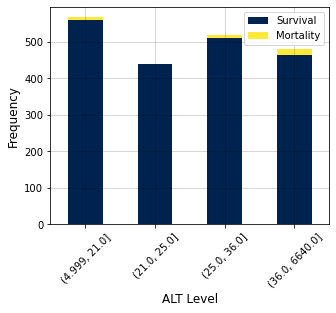

In [187]:
bivariate_table_bar2('ALT_group','ALT group', 'ALT Level')

Findings:
- There is an apparent increase in mortality on the 4th quartiles of ALT level

28-Day Mortality Among LDH group Groups


Frequency  % per group  % overall
mort.28d LDH_group                                   
0        101-200          521        26.43      25.95
         201-300         1129        57.28      56.23
         301-400          201        10.20      10.01
         401-500           54         2.74       2.69
         > 500             66         3.35       3.29
1        101-200            6        16.22       0.30
         201-300           14        37.84       0.70
         301-400            4        10.81       0.20
         401-500            2         5.41       0.10
         > 500             11        29.73       0.55

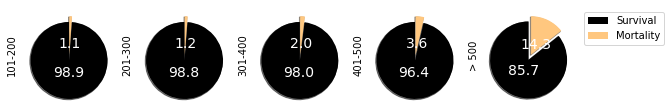

In [167]:
bivariate_table_pieplots3('LDH_group','LDH group')

Findings:
- There seems to be a steady increase in mortality rate as LDH increases

#### II. B. Bivariate Analyses:  
####          2.  Based on Published Risk Score

Note:  The rest of the bivariate analysis will check the variables based on the Risk scoring developed by the Meta-Analysis Global Group in Chronic Heart Failure (MAGGIC), where the variable is available in the present data

28-Day Mortality Among Age Groups


Frequency  % per group  % overall
mort.28d age                                        
0        (21,29]           4         0.20       0.20
         (29,39]          12         0.61       0.60
         (39,49]          55         2.79       2.74
         (49,59]         104         5.28       5.18
         (59,69]         362        18.37      18.03
         (69,79]         702        35.62      34.96
         (79,89]         632        32.06      31.47
         (89,110]        100         5.07       4.98
1        (39,49]           1         2.70       0.05
         (49,59]           2         5.41       0.10
         (59,69]           6        16.22       0.30
         (69,79]          13        35.14       0.65
         (79,89]          14        37.84       0.70
         (89,110]          1         2.70       0.05

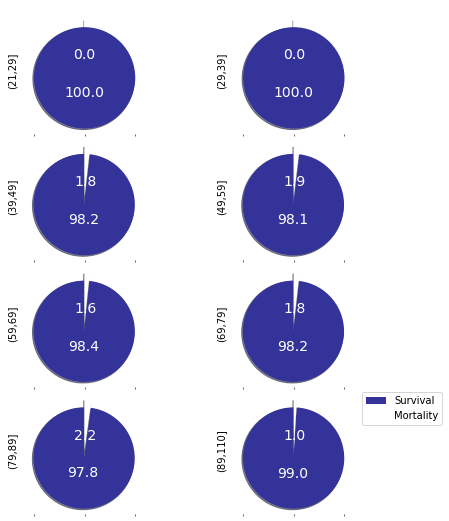

In [168]:
bivariate_table_pieplots1('age','Age')

Findings:
- Mortality rate did not vary much between age groups
- Rate ranged from 0 (21-39 years) to 2.2% (79-89 years)

Mortality Based on NYHA


Frequency  % per group  % overall
NYHA mort.28d                                   
2    0               350        99.15      17.43
     1                 3         0.85       0.15
3    0              1032        99.33      51.39
     1                 7         0.67       0.35
4    0               589        95.62      29.33
     1                27         4.38       1.34

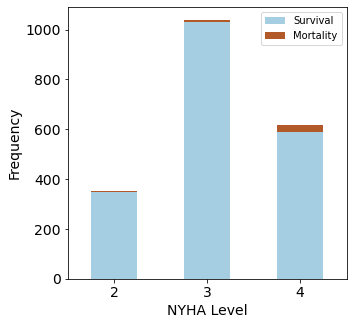

In [169]:
bivariate_table_bar1('NYHA','NYHA', 'NYHA Level')

Findings:
- The higher NYHA levels 3 and 4 had more mortality occurrences

In [170]:
# previous binning does not lead to proper ordering of indices, thus the re-bin
hf3['crea_group2'] = pd.qcut(hf3['crea'], q=4)

Mortality Based on Serum Creatinine


Frequency  % per group  % overall
crea_group2    mort.28d                                   
(26.999, 65.0] 0               519        99.24      25.85
               1                 4         0.76       0.20
(65.0, 86.0]   0               482        99.38      24.00
               1                 3         0.62       0.15
(86.0, 122.0]  0               501        98.62      24.95
               1                 7         1.38       0.35
(122.0, 963.0] 0               469        95.33      23.36
               1                23         4.67       1.15

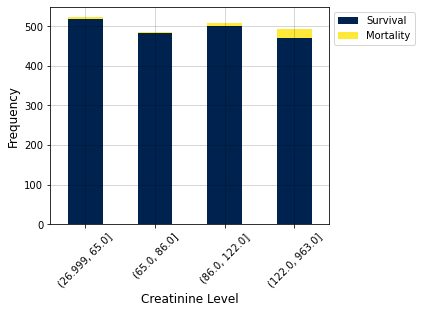

In [171]:
bivariate_table_bar2('crea_group2','Serum Creatinine', 'Creatinine Level')

Findings:
- There is an apparent increased mortality for the highest quantile of creatinine levels

28-Day Mortality Among Diabetes Groups


Frequency  % per group  % overall
mort.28d DM                                   
0        0        1513        76.76      75.35
         1         458        23.24      22.81
1        0          29        78.38       1.44
         1           8        21.62       0.40

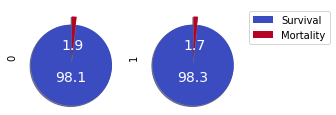

In [172]:
bivariate_table_pieplots5('DM','Diabetes')

Findings:
- There was no difference in mortality between patients who did or did not have DM

In [173]:
hf3['SBP_group2'] = pd.qcut(hf3['SBP'], q=10)

Mortality Based on Systolic BP


Frequency  % per group  % overall
SBP_group2      mort.28d                                   
(-0.001, 100.0] 0               229        95.82      11.40
                1                10         4.18       0.50
(100.0, 110.0]  0               226        98.69      11.25
                1                 3         1.31       0.15
(110.0, 120.0]  0               282        98.60      14.04
                1                 4         1.40       0.20
(120.0, 122.8]  0                49       100.00       2.44
(122.8, 130.0]  0               291        97.98      14.49
                1                 6         2.02       0.30
(130.0, 138.0]  0               147        99.32       7.32
                1                 1         0.68       0.05
(138.0, 142.0]  0               181        97.31       9.01
                1                 5         2.69       0.25
(142.0, 150.0]  0               198        99.00       9.86
                1                 2         1.00       0.10
(150.0, 162.0]  0               175        98.31       8.72
                1                 3         1.69       0.15
(162.0, 252.0]  0               193        98.47       9.61
                1                 3         1.53       0.15

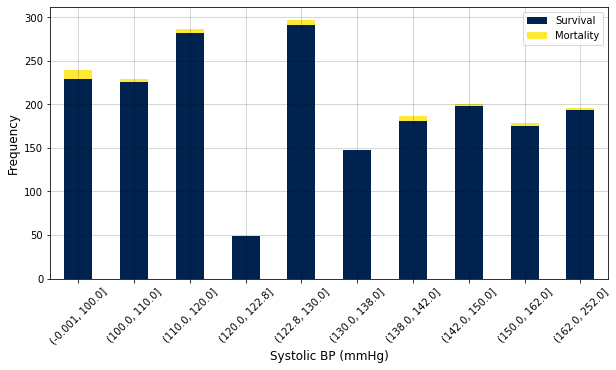

In [174]:
bivariate_table_bar3('SBP_group2','Systolic BP', 'Systolic BP (mmHg)')

Findings:
- There are representatives of deaths in every cut of SBP, however, it is highest in the lowest group, with SBP <100 mmHg

28-Day Mortality Among BMI Groups


Frequency  % per group  % overall
mort.28d BMI_group                                   
0        15.1 - 17        324        16.44      16.14
         17.1 - 19        417        21.16      20.77
         19.1 - 21        427        21.66      21.26
         21.1 - 23        306        15.53      15.24
         23.1 - 25        195         9.89       9.71
         25.1 - 27        113         5.73       5.63
         <15               75         3.81       3.74
         >27              114         5.78       5.68
1        15.1 - 17          9        24.32       0.45
         17.1 - 19          9        24.32       0.45
         19.1 - 21          3         8.11       0.15
         21.1 - 23         10        27.03       0.50
         23.1 - 25          4        10.81       0.20
         25.1 - 27          1         2.70       0.05
         >27                1         2.70       0.05

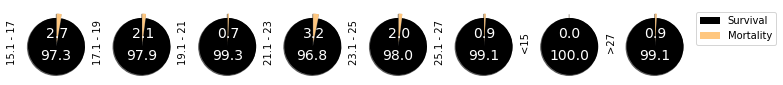

In [175]:
bivariate_table_pieplots4('BMI_group','BMI')

Findings:
- There was no significant pattern for mortality among the BMI groups

28-Day Mortality Among Chronic Obstructive Pulmonary Disease Groups


Frequency  % per group  % overall
mort.28d COPD                                   
0        0          1740        88.28      86.65
         1           231        11.72      11.50
1        0            35        94.59       1.74
         1             2         5.41       0.10

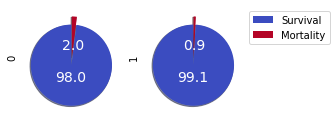

In [176]:
bivariate_table_pieplots5('COPD','Chronic Obstructive Pulmonary Disease')

Findings:
- There was no association between COPD and mortality

28-Day Mortality Among Gender Groups


Frequency  % per group  % overall
mort.28d gender                                   
0        Female       1147        58.19      57.12
         Male          824        41.81      41.04
1        Female         16        43.24       0.80
         Male           21        56.76       1.05

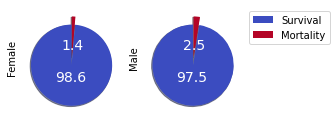

In [177]:
bivariate_table_pieplots5('gender','Gender')

Findings:
- There seems to have a slightly higher occurence of mortality among males (2.5 vs 1.4%)

#### II. B. Additional Bivariate Analyses:  
####          3.  Based on Clinical Practice

Considering other variables relevant to clinical practice

In [178]:
hf3['LVEDD_group2'] = pd.qcut(hf3['LVEDD'], q=4)

Mortality Based on LV End Diastolic Diameter


Frequency  % per group  % overall
LVEDD_group2   mort.28d                                   
(21.999, 49.0] 0               517        99.23      25.75
               1                 4         0.77       0.20
(49.0, 52.0]   0               557        99.11      27.74
               1                 5         0.89       0.25
(52.0, 55.0]   0               406        95.53      20.22
               1                19         4.47       0.95
(55.0, 88.0]   0               491        98.20      24.45
               1                 9         1.80       0.45

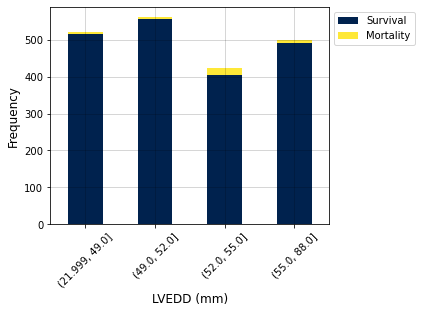

In [179]:
bivariate_table_bar2('LVEDD_group2','LV End Diastolic Diameter', 'LVEDD (mm)')

Findings:
- Mortality was associated with high-normal diameters, but not with very distended LVs

In [180]:
hf3['BNP_group'] = pd.qcut(hf3['BNP'], q=4)

Mortality Based on BNP Level


Frequency  % per group  % overall
BNP_group         mort.28d                                   
(1.999, 310.75]   0               498        99.20      24.80
                  1                 4         0.80       0.20
(310.75, 744.0]   0               499        98.81      24.85
                  1                 6         1.19       0.30
(744.0, 1720.25]  0               487        97.60      24.25
                  1                12         2.40       0.60
(1720.25, 5000.0] 0               487        97.01      24.25
                  1                15         2.99       0.75

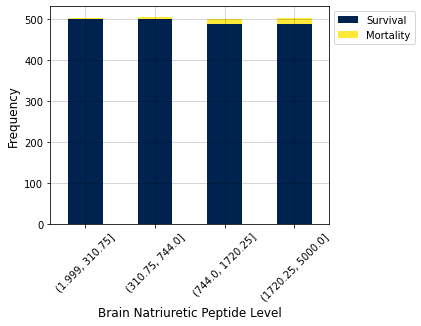

In [181]:
bivariate_table_bar2('BNP_group','BNP Level', 'Brain Natriuretic Peptide Level')

Findings:
- There is a trend of higher mortality rates in the higher quartile BNP groups (>744)

In [182]:
hf3['LOS_group2'] = pd.qcut(hf3['LOS'], q=4)

Mortality Based on Length of Stay


Frequency  % per group  % overall
LOS_group2    mort.28d                                   
(0.999, 6.0]  0               666        95.97      33.17
              1                28         4.03       1.39
(6.0, 8.0]    0               490        99.39      24.40
              1                 3         0.61       0.15
(8.0, 10.0]   0               322        99.69      16.04
              1                 1         0.31       0.05
(10.0, 123.0] 0               493        99.00      24.55
              1                 5         1.00       0.25

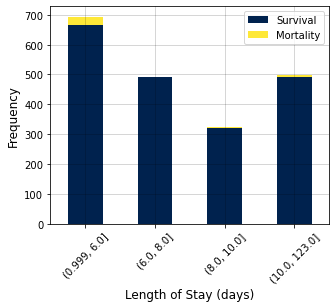

In [183]:
bivariate_table_bar2('LOS_group2','Length of Stay', 'Length of Stay (days)')

Findings:
- Supports the observation in the Univariate analysis:  The highest mortality occurs in the first week of admission

#### III.  A.  Multivariate Analyses: Custom Codes

In [184]:
def multivariable_bubble(varx, vary, varsize, title):
    plt.figure(figsize = (12,7))
    sns.scatterplot(data = hf3, x = varx, y = vary, hue = 'mort.28d',
                   size = varsize, sizes = (50,250), legend = 'brief', alpha = 1)
    plt.title('Mortality Status Distribution on the Background of %s'%title)

#### III. B.  Select Multivariate Analyses

Based on relevant variables identified

#### IV.  Summary of Findings:  Bivariate and Multivariate Analyses

Based on Correlation of Cohort data

- There is no strong correlation of the variables with the outcome of 28-day mortality
- The highest correlation was that of GCS at -0.4, followed by AST at +0.3
- There was a trend of increased mortality with:
    - low GCS scores 3-4
    - high Killip score 3-4
    - increasing O2 requirement
    - elevated CK enzyme, ALT and LDH levels


Based on Variables previously identified for Predictive Scoring:

- There was a trend of increased mortality with:
    - high NYHA level 3-4
    - elevated serum creatinine
    - low systolic BP
    - male gender

- There was no associated increased mortality with:
    - different age groups
    - DM
    - COPD

Based on Other Variables Relevant to Clinical Practice:

-  There was a trend of increased mortality with:
    - elevated BNP
-  Mortalities tended to occur within the 1st week of admission
-  Mortality occurred more commonly on the high-normal LVEDD, but not the markedly distended ones